In [1]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install qiskit
!pip install pylatexenc
!pip install mitiq

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-tc5nte2x
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-tc5nte2x
     |████████████████████████████████| 6.4 MB 27.4 MB/s 
     |████████████████████████████████| 17.9 MB 630 kB/s 
     |████████████████████████████████| 237 kB 47.7 MB/s 
     |████████████████████████████████| 200 kB 59.6 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 1.4 MB 35.7 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 943 kB 64.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 34.6 MB/s 
     |████████████████████████████████| 112 kB 39.0 MB/s 
  Created wheel for qiskit-textbook: fil

In [2]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

###debig


In [ ]:
img = np.array([0,128,192,255])
rms = np.sqrt(np.sum(np.sum(img**2)))
i2norm = np.array([x / rms for x in img])
i2norm**2

array([0.        , 0.13852697, 0.31168568, 0.54978736])

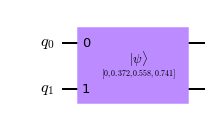

In [ ]:
qc = QuantumCircuit(2)
qc.initialize(i2norm, range(0, 2))
display(qc.draw('mpl', fold=-1))

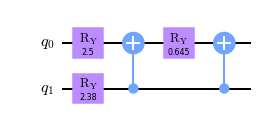

In [ ]:
trqc = transpile(qc, basis_gates=['cx', 'ry'])
display(trqc.draw('mpl', fold=-1))

In [ ]:
D2n_1 = np.roll(np.identity(2**3), 1, axis=1)
D2n_1

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

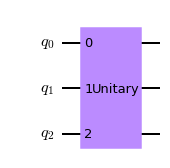

In [ ]:
qc = QuantumCircuit(3)
qc.unitary(D2n_1, range(3))
display(qc.draw('mpl', fold=-1))

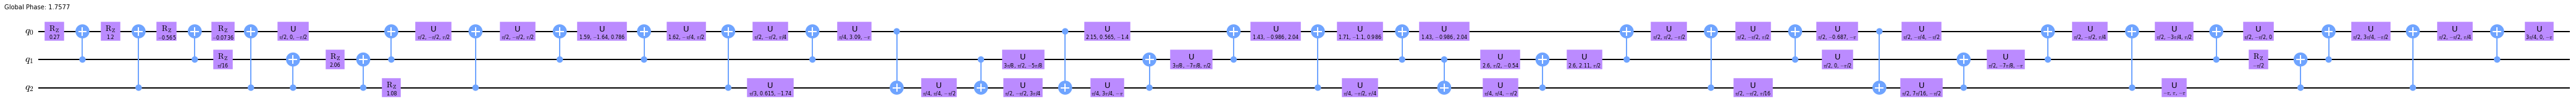

In [ ]:
trqc = transpile(qc, basis_gates=['cx', 'u', 'rz', 'ry'])
display(trqc.draw('mpl', fold=-1))

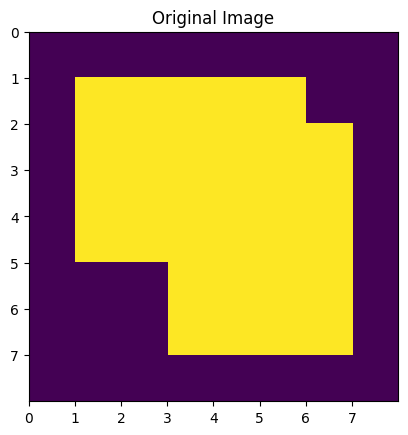

In [ ]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    if abs(rms) < 0.00001:
        return None

    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)

    return np.array(image_norm)

###useful


Raw Image info: (256, 256, 3)
Raw Image datatype: uint8
Image shape (numpy array): (256, 256)


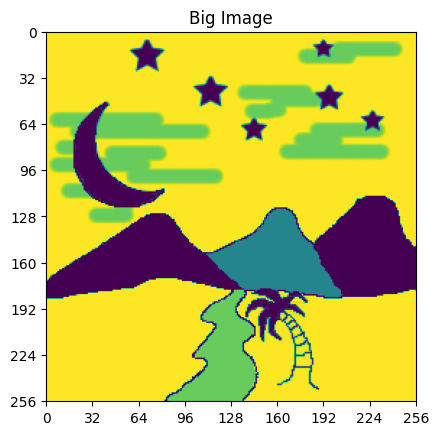

In [ ]:
from PIL import Image
style.use('default')

image_size = 256       # Original image-width
image_crop_size = 32   # Width of each part of image for processing


# Load the image from filesystem
image_raw = np.array(Image.open('./drive/MyDrive/edge_detection_input.jpg'))
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)


# Convert the RBG component of the image to B&W image, as a numpy (uint8) array
image = []
for i in range(image_size):
    image.append([])
    for j in range(image_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)#[::2, ::2]
print('Image shape (numpy array):', image.shape)


# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    #img[0][0] = 0
    plt.title(title)
    plt.xticks(range(0, image.shape[0]+1, 32))
    plt.yticks(range(0, image.shape[1]+1, 32))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    
plot_image(image, 'Big Image')
# Display the image
#plt.title('Big Image')
#plt.xticks(range(0, image.shape[0]+1, 32))
#plt.yticks(range(0, image.shape[1]+1, 32))
#plt.imshow(image, extent=[0, image.shape[0], image.shape[1], 0], cmap='viridis')
#plt.show()

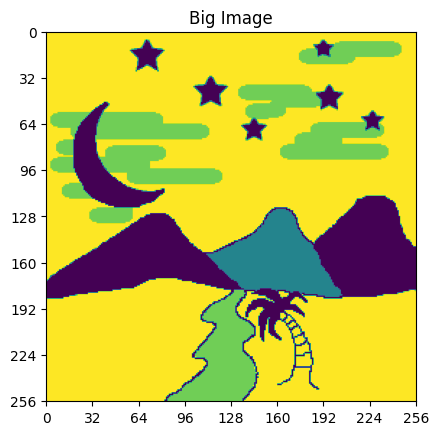

In [ ]:
import cv2
import numpy as np

def kmeans_color_quantization(image, clusters=8, rounds=1):
    h, w = image.shape[:2]
    samples = np.zeros([h*w], dtype=np.float32)
    count = 0

    for x in range(h):
        for y in range(w):
            samples[count] = np.float32(image[x][y])
            count += 1

    compactness, labels, centers = cv2.kmeans(samples,
            clusters, 
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
            rounds, 
            cv2.KMEANS_RANDOM_CENTERS)

    #centers = np.uint8(centers *)
    #print(list(labels))
    res = centers[labels.flatten()]
    return res.reshape((image.shape)), centers, labels

seg, centers, labels = kmeans_color_quantization(image, clusters=4)
plot_image(seg, 'Big Image')

In [ ]:
unique, counts = np.unique(seg, return_counts=True)
dict(zip(unique, counts))

{0.0061874553: 11149, 0.45344955: 3179, 0.7814585: 9246, 0.99779963: 41962}

In [ ]:
enc = ["{0:b}".format(x) for x in labels.flatten()]
unique, counts = np.unique(enc, return_counts=True)
dict(zip(unique, counts))

{'0': 3179, '1': 9246, '10': 41962, '11': 11149}

In [ ]:
# Initialize some global variable for number of qubits
data_qb = 6
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)


  0%|          | 0/37 [00:00<?, ?it/s]

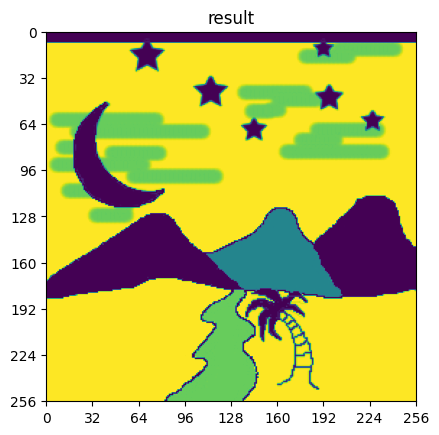

 27%|██▋       | 10/37 [01:07<03:50,  8.54s/it]

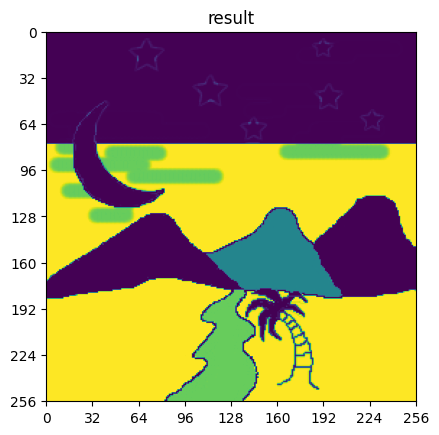

 54%|█████▍    | 20/37 [02:19<01:53,  6.65s/it]

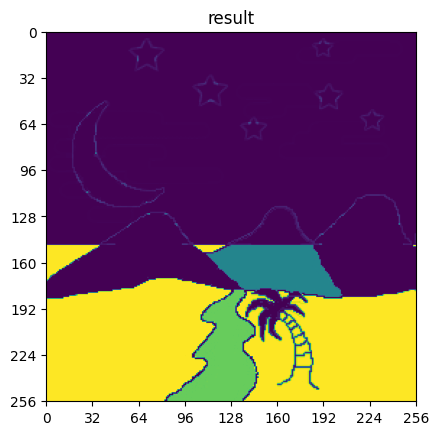

 81%|████████  | 30/37 [03:17<00:38,  5.54s/it]

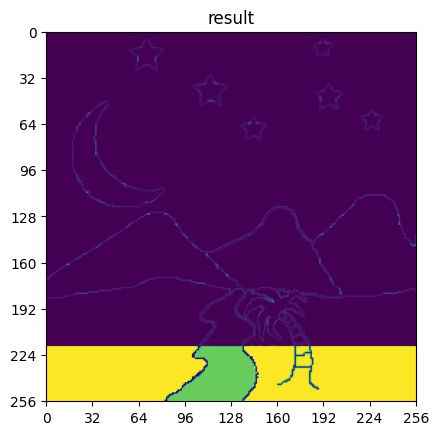

100%|██████████| 37/37 [03:41<00:00,  5.99s/it]


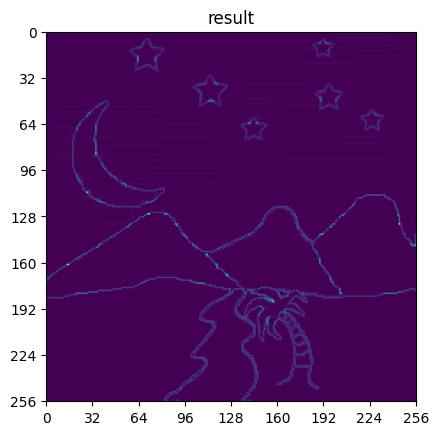

In [ ]:
import tqdm
CHUNK_POWER = 3
CHUNK_SIZE = 2 ** CHUNK_POWER

#image = result
w, h = image.shape

chunks = [];
back = Aer.get_backend('statevector_simulator')
result = image.copy()

for i in tqdm.tqdm(range(0, w // (CHUNK_SIZE - 1) + 1)):
    for j in range(h // (CHUNK_SIZE - 1) + 1):
        offsetx = i * CHUNK_SIZE - i
        offsety = j * CHUNK_SIZE - j
        if w - offsetx < CHUNK_SIZE:
            offsetx = w - CHUNK_SIZE
        if h - offsety < CHUNK_SIZE:
            offsety = h - CHUNK_SIZE

        chunk = image[offsetx : offsetx + CHUNK_SIZE, offsety : offsety + CHUNK_SIZE]
        chunk_seg = seg[offsetx : offsetx + CHUNK_SIZE, offsety : offsety + CHUNK_SIZE]

        # Get the amplitude ancoded pixel values
        # Horizontal: Original image
        chunk_norm_h = amplitude_encode(chunk)
        if chunk_norm_h is None or np.all(chunk_seg == chunk_seg[0][0]):
            edge_scan_h = np.abs(np.array([0.0 for i in range(2**data_qb)])).reshape(CHUNK_SIZE, CHUNK_SIZE)
            edge_scan_v = np.abs(np.array([0.0 for i in range(2**data_qb)])).reshape(CHUNK_SIZE, CHUNK_SIZE).T
            result[offsetx : offsetx + CHUNK_SIZE, offsety : offsety + CHUNK_SIZE] = np.sqrt(edge_scan_h **2 + edge_scan_v**2)
            continue

        chunk_norm_v = amplitude_encode(chunk.T)

        # Vertical: Transpose of Original image
        qc_h = QuantumCircuit(total_qb)
        qc_h.initialize(chunk_norm_h, range(1, total_qb))
        qc_h.h(0)
        qc_h.unitary(D2n_1, range(total_qb))
        qc_h.h(0)
        #display(qc_h.draw('mpl', fold=-1))

        # Create the circuit for vertical scan
        qc_v = QuantumCircuit(total_qb)
        qc_v.initialize(chunk_norm_v, range(1, total_qb))
        qc_v.h(0)
        qc_v.unitary(D2n_1, range(total_qb))
        qc_v.h(0)
        #display(qc_v.draw('mpl', fold=-1))

        # Combine both circuits into a single list
        circ_list = [qc_h, qc_v]
        # Simulating the cirucits
        results = execute(circ_list, backend=back).result()
        sv_h = results.get_statevector(qc_h)
        sv_v = results.get_statevector(qc_v)

        # Defining a lambda function for
        # thresholding to binary values
        threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

        # Selecting odd states from the raw statevector and
        # reshaping column vector of size 64 to an 8x8 matrix
        # edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(16, 16)
        # edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(16, 16).T

        edge_scan_h = np.abs(np.array([sv_h[2*i+1].real for i in range(2**data_qb)])).reshape(CHUNK_SIZE, CHUNK_SIZE)
        edge_scan_v = np.abs(np.array([sv_v[2*i+1].real for i in range(2**data_qb)])).reshape(CHUNK_SIZE, CHUNK_SIZE).T

        result[offsetx : offsetx + CHUNK_SIZE, offsety : offsety + CHUNK_SIZE] = np.sqrt(edge_scan_h **2 + edge_scan_v**2)
        #print(j)
    #print(i)
    if i % 10 == 0:
        plot_image(result, 'result')

plot_image(result, 'result')

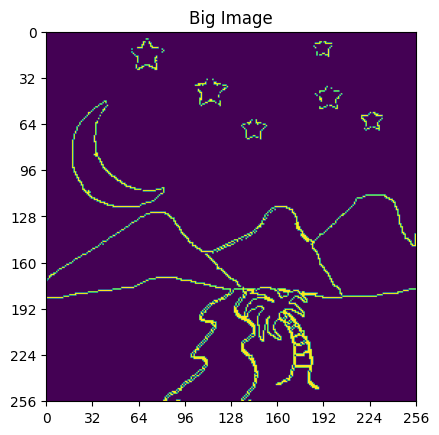

In [ ]:
resseg, centers, labels = kmeans_color_quantization(result, clusters=2)
plot_image(resseg, 'Big Image')

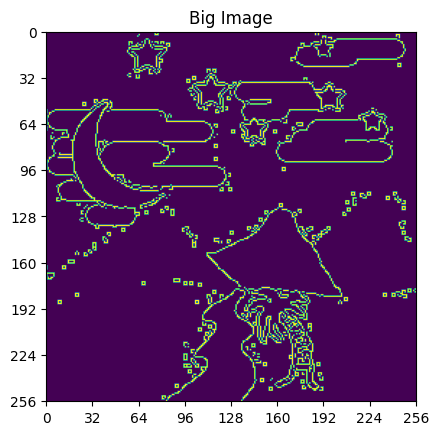

In [ ]:
edges = cv2.Canny((image * 256).astype(np.uint8),100,200)
plot_image(edges, 'Big Image')

###Run on real HW


In [ ]:
from qiskit import IBMQ
from qiskit.providers import ibmq as qutils
# Load the IBMQ account
try:
    IBMQ.load_account()
except Exception as e:
    api_key = "b439ee669297f303f8804f1ed40d7122db2c2780aff3f8422d4f51c7084a9d9a9c35445674c140fb0e19ed93a1b54b508cca3dce3a62bc8dea02c0dcda3b067f"
    IBMQ.save_account(api_key, overwrite=True)
    IBMQ.load_account()

# Get the provider and backend
provider = IBMQ.get_provider(hub='ibm-q', group='open')
backend = provider.get_backend('ibmq_bogota')

In [ ]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [ ]:
lookup = []
better = {
    'ibmq_bogota',
    #'ibmq_santiago',
    #'ibmq_quito',
    #'ibmq_belem',
    #'ibmq_manila'
}
for b in provider.backends():
    if b.properties() is None:
        continue
    if str(b) in better and len(b.properties().qubits) >= 4:
        lookup.append(b)
print(lookup)
backend = qutils.least_busy(lookup)

[<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:
backend.name()

'ibmq_bogota'

(4, 4)


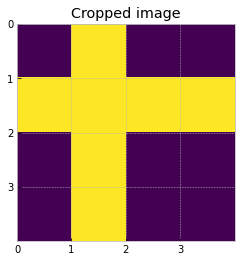

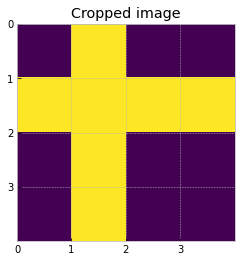

In [3]:
image = np.array([[0, 1,0,0],
                  [1, 1,1,1],
                  [0, 1,0,0],
                  [0, 1,0,0]])
#image = np.array([[0, 1],
#                  [0, 0]])
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()

# Plotting the image_small using matplotlib
print(image.shape)
plot_image(image, 'Cropped image')
plot_image(image.T, 'Cropped image')


In [ ]:
# Convert the raw pixel values to probability amplitudes
import math
size = int(math.sqrt(2**data_qb))
def amplitude_encode(img):
    amp = img.reshape(size**2, 1)
    norm = np.linalg.norm(amp)
    if(norm == 0):
        amp[0] = 1
        norm = np.linalg.norm(amp)
    amp = amp/norm
    return amp.tolist()

data_qb = 4
anc_qb = 1
total_qb = data_qb + anc_qb
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
image_norm_h = amplitude_encode(image)
image_norm_v = amplitude_encode(image.T)

In [ ]:
D2n_1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(image_norm_h[0:4])
print(image_norm_h[4:8])
print(image_norm_h[8:12])
print(image_norm_h[12:])

[[0.0], [0.0], [0.0], [0.0]]
[[0.0], [0.0], [0.5773502691896258], [0.0]]
[[0.0], [0.5773502691896258], [0.5773502691896258], [0.0]]
[[0.0], [0.0], [0.0], [0.0]]


In [ ]:
print(image_norm_v[0:4])
print(image_norm_v[4:8])
print(image_norm_v[8:12])
print(image_norm_v[12:])

[[0.0], [0.0], [0.0], [0.0]]
[[0.0], [0.0], [0.5773502691896258], [0.0]]
[[0.0], [0.5773502691896258], [0.5773502691896258], [0.0]]
[[0.0], [0.0], [0.0], [0.0]]


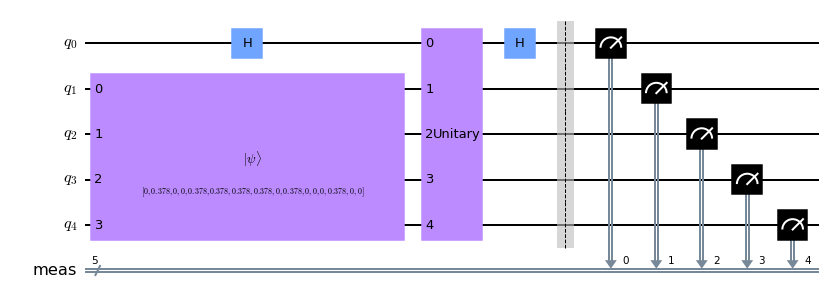

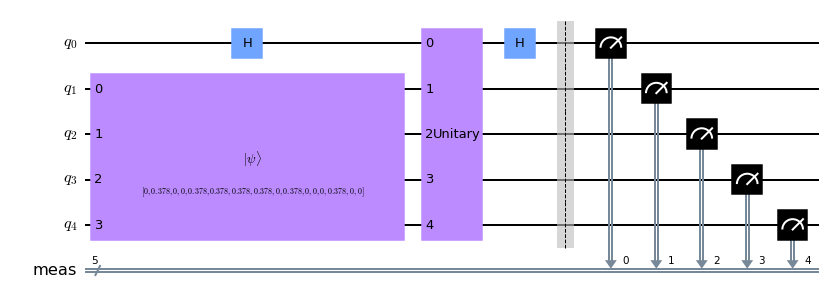

In [ ]:
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(Statevector(image_norm_h), range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
qc_h.measure_all()
display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(Statevector(image_norm_v), range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
qc_v.measure_all()

display(qc_v.draw('mpl', fold=-1))

In [ ]:
trqc_h = transpile(qc_h, backend=backend, basis_gates=['cx', 'u', 'ry', 'h'])
trqc_h.depth()

2811

In [ ]:
trqc_v = transpile(qc_v, backend=backend, basis_gates=['cx', 'u', 'ry', 'h'])
trqc_v.depth()

2808

In [ ]:
backend.name()

'ibmq_bogota'

#### exec


In [ ]:
#circ_list_t = [qc_small_h_t, qc_small_v_t]
circ_list_t = [trqc_h, trqc_v]

# Drawing the transpiled circuit
#display(circ_list_t[0].draw('mpl', fold=-1))
#display(circ_list_t[1].draw('mpl', fold=-1))

In [ ]:
qc_small_h_t = transpile(qc_h, backend=backend, optimization_level=3)
qc_small_v_t = transpile(qc_v, backend=backend, optimization_level=3)
print(qc_small_h_t.depth(), qc_small_v_t.depth())

5789 5714


In [ ]:
from qiskit.tools.monitor import job_monitor
#circ_list_t = [qc_small_h_t, qc_small_v_t]
# Executing the circuits on the backend
job = execute(circ_list_t, backend=backend, shots=8192)
job_monitor(job)

Job Status: job has successfully run


In [ ]:
result = job.result()
result.results

[ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 617, '0x1': 713, '0x10': 335, '0x11': 345, '0x12': 249, '0x13': 255, '0x14': 290, '0x15': 296, '0x16': 241, '0x17': 191, '0x18': 126, '0x19': 173, '0x1a': 121, '0x1b': 124, '0x1c': 141, '0x1d': 145, '0x1e': 117, '0x1f': 135, '0x2': 403, '0x3': 451, '0x4': 349, '0x5': 438, '0x6': 297, '0x7': 309, '0x8': 230, '0x9': 227, '0xa': 150, '0xb': 164, '0xc': 154, '0xd': 159, '0xe': 117, '0xf': 130}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2], ['meas', 3], ['meas', 4]], creg_sizes=[['meas', 5]], global_phase=5.497824417943775e-13, memory_slots=5, metadata={}, n_qubits=5, name='circuit-233080', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]])),
 ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 455, '0x1': 644, '0x10': 359, '0x11': 401, '0x12': 204, '0x13': 287, '0x14': 223, '

In [ ]:
result.get_counts(qc_h)

Counts for Horizontal scan:


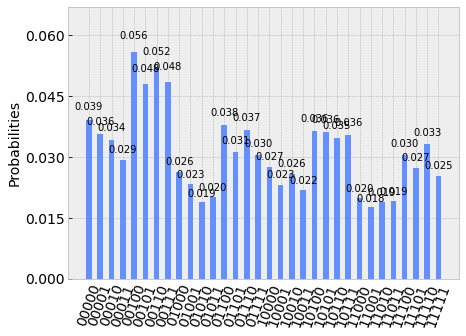



Counts for Vertical scan:


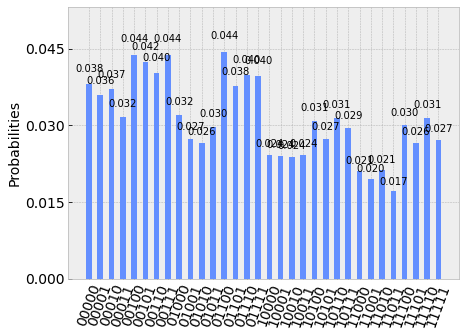

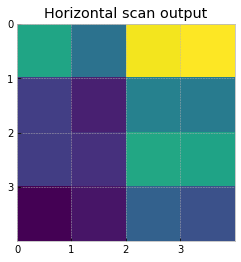

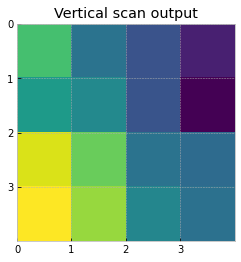

QiskitError: ignored

In [ ]:
result = job.result()
counts_h = result.get_counts(qc_h)
counts_v = result.get_counts(qc_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

edge_scan_small_h = np.array([counts_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')
sv_h = result.get_statevector(qc_h)
sv_v = result.get_statevector(qc_v)
edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')

#### Error metig


Job Status: job has successfully run


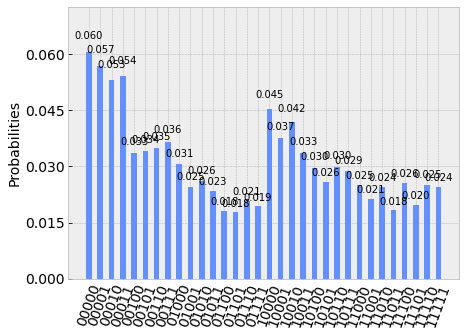

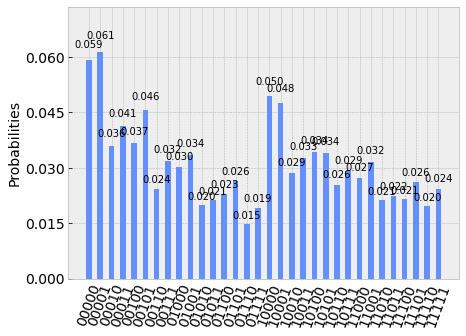

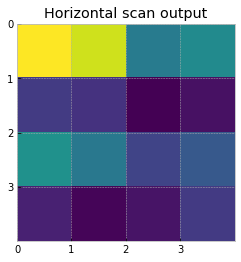

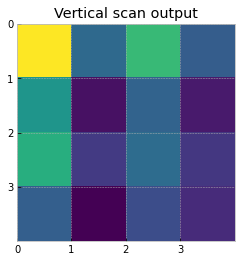

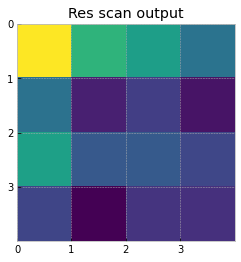

In [ ]:
import math
from qiskit.tools.monitor import job_monitor
size = int(math.sqrt(2**data_qb))

qcs = []

def normalise(img):
    amp = img.reshape(size**2, 1)
    norm = np.linalg.norm(amp)
    if(norm == 0):
        amp[0] = 1
        norm = np.linalg.norm(amp)
    amp = amp/norm
    return amp.tolist()

def get_edge_scan(sv_h, sv_v):
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

    edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size)
    edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size).T

    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = edge_scan_h | edge_scan_v
    return edge_scan

def get_edge_scan_cnt(sv_h, sv_v):
    edge_scan_h = np.array([sv_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
    edge_scan_v = np.array([sv_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T
    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = np.sqrt(edge_scan_h**2 + edge_scan_v**2)
    plot_image(edge_scan, 'Res scan output')

    return edge_scan

def edge_detection(img):
    D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
    img = image
    arr_h = normalise(img)
    arr_v = normalise(img.T)

    #print(arr_h, image_norm_h)
    arr_h = Statevector(arr_h) 
    arr_v = Statevector(arr_v)

    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(arr_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)
    qc_h.measure_all()

    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(arr_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)
    qc_v.measure_all()

    trqc_h = transpile(qc_h, backend=backend, basis_gates=['cx', 'u', 'ry', 'h'])
    trqc_v = transpile(qc_v, backend=backend, basis_gates=['cx', 'u', 'ry', 'h'])

    circ_list = [trqc_h, trqc_v]

    qcs.append(qc_h)
    qcs.append(qc_v)
    job = execute(circ_list, backend=backend, shots=8192)
    job_monitor(job)
    results = job.result()
    sim_counts_h = results.get_counts(qc_h)
    sim_counts_v = results.get_counts(qc_v)
    sim_keys_h = sim_counts_h.keys()
    sim_keys_v = sim_counts_v.keys()
    display(plot_histogram(sim_counts_h))
    display(plot_histogram(sim_counts_v))
    get_edge_scan_cnt(sim_counts_h, sim_counts_v)

    return results
results = edge_detection(image)

32


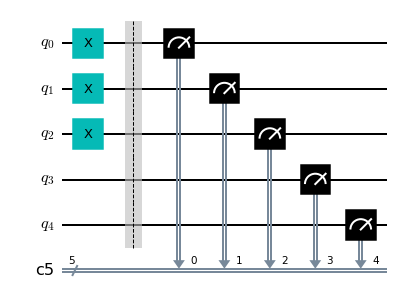

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

cal_circuits, state_labels = complete_meas_cal(qr=qcs[0].qregs[0], 
                                               circlabel='measurement_calibration')
print(len(cal_circuits))
cal_circuits[7].draw(output='mpl')

Job Status: job has successfully run


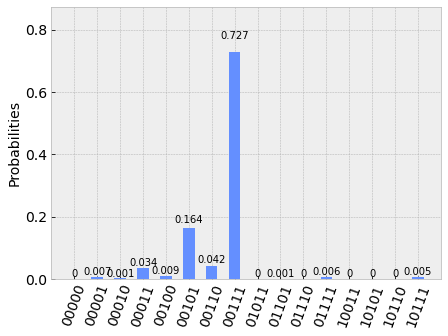

In [ ]:
cal_job = execute(cal_circuits,
             backend=backend,
             shots=8192,
             optimization_level=0)
#print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()
plot_histogram(cal_results.get_counts(cal_circuits[7]))

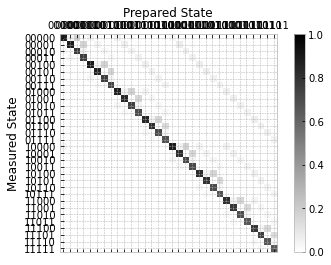

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

In [ ]:
meas_filter = meas_fitter.filter

In [ ]:
qcs

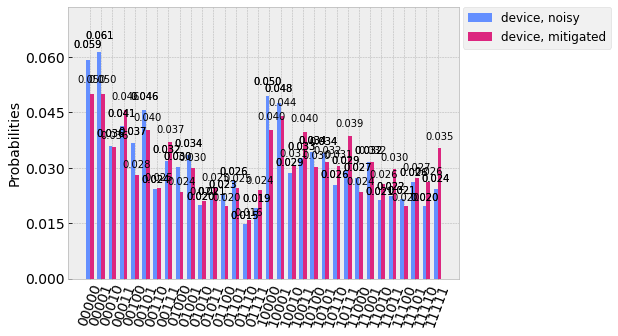

In [ ]:
plot_histogram([device_counts_v, mitigated_counts_v], 
               legend=['device, noisy', 'device, mitigated'])

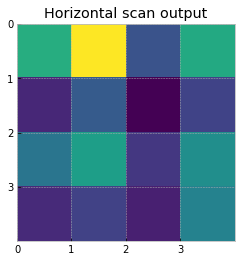

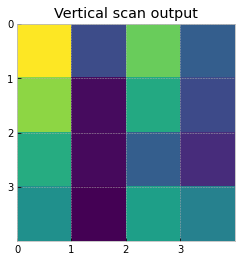

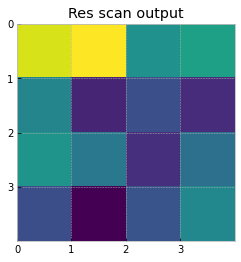

array([[547.60057944, 564.6394446 , 422.8962349 , 440.6465149 ],
       [408.33688974, 308.00865288, 347.84693516, 314.65519163],
       [426.04018001, 393.14567277, 317.97538066, 383.62460078],
       [346.67504024, 277.7795519 , 352.69463302, 411.58555808]])

In [ ]:
mitigated_result = meas_filter.apply(results)
device_counts_h = results.get_counts(qcs[0])
mitigated_counts_h = mitigated_result.get_counts(qcs[0])
plot_histogram([device_counts_h, mitigated_counts_h], 
               legend=['device, noisy', 'device, mitigated'])

mitigated_result = meas_filter.apply(results)
device_counts_v = results.get_counts(qcs[1])
mitigated_counts_v = mitigated_result.get_counts(qcs[1])
plot_histogram([device_counts_v, mitigated_counts_v], 
               legend=['device, noisy', 'device, mitigated'])

get_edge_scan_cnt(mitigated_counts_h, mitigated_counts_v)

Job Status: job has successfully run


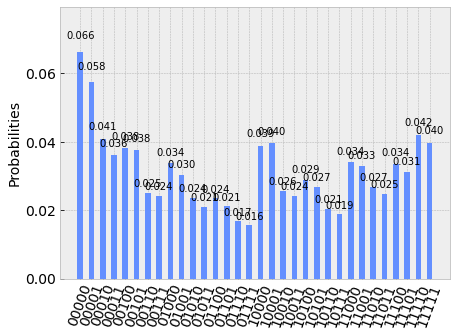

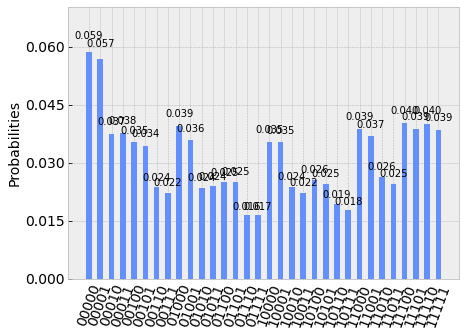

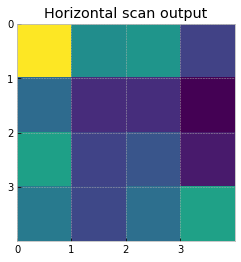

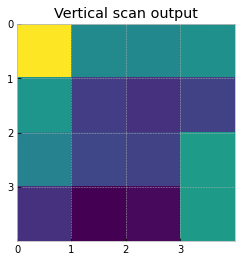

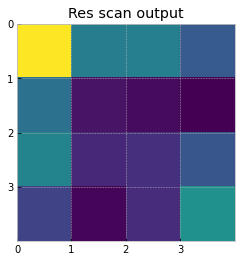

In [ ]:
import math
from qiskit.tools.monitor import job_monitor
from qiskit.test.mock import FakeVigo
from qiskit.providers.aer import AerSimulator


device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(device_backend)
size = int(math.sqrt(2**data_qb))
qcs = []

def normalise(img):
    amp = img.reshape(size**2, 1)
    norm = np.linalg.norm(amp)
    if(norm == 0):
        amp[0] = 1
        norm = np.linalg.norm(amp)
    amp = amp/norm
    return amp.tolist()

def get_edge_scan(sv_h, sv_v):
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

    edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size)
    edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size).T

    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = edge_scan_h | edge_scan_v
    return edge_scan

def get_edge_scan_cnt(sv_h, sv_v):
    edge_scan_h = np.array([sv_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
    edge_scan_v = np.array([sv_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T
    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = np.sqrt(edge_scan_h**2 + edge_scan_v**2)
    plot_image(edge_scan, 'Res scan output')

    return edge_scan

def edge_detection(img):
    D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
    img = image
    arr_h = normalise(img)
    arr_v = normalise(img.T)

    #print(arr_h, image_norm_h)
    arr_h = Statevector(arr_h) 
    arr_v = Statevector(arr_v)

    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(arr_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)
    qc_h.measure_all()

    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(arr_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)
    qc_v.measure_all()

    trqc_h = transpile(qc_h, backend=sim_vigo, basis_gates=['cx', 'u3', 'ry', 'h'])
    trqc_v = transpile(qc_v, backend=sim_vigo, basis_gates=['cx', 'u3', 'ry', 'h'])

    circ_list = [trqc_h, trqc_v]

    qcs.append(qc_h)
    qcs.append(qc_v)

    job = execute(circ_list, backend=sim_vigo, shots=100000)
    job_monitor(job)
    results = job.result()
    sim_counts_h = results.get_counts(qc_h)
    sim_counts_v = results.get_counts(qc_v)
    sim_keys_h = sim_counts_h.keys()
    sim_keys_v = sim_counts_v.keys()
    display(plot_histogram(sim_counts_h))
    display(plot_histogram(sim_counts_v))
    get_edge_scan_cnt(sim_counts_h, sim_counts_v)

    return results
results = edge_detection(image)

32
Job Status: job has successfully run


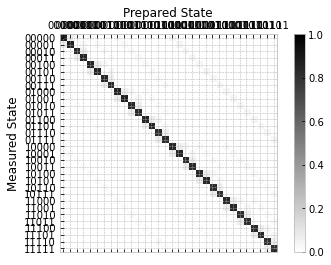

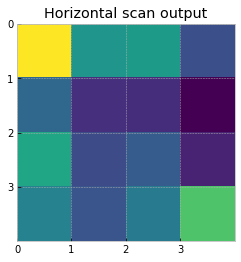

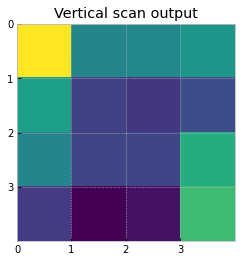

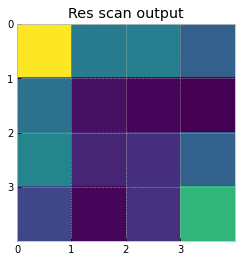

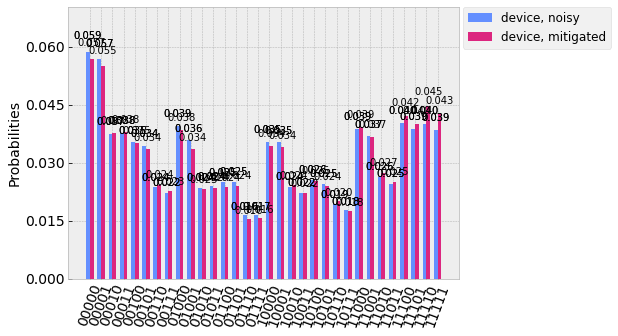

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

cal_circuits, state_labels = complete_meas_cal(qr=qcs[0].qregs[0], 
                                               circlabel='measurement_calibration')
print(len(cal_circuits))
cal_circuits[7].draw(output='mpl')

cal_job = execute(cal_circuits,
             backend=sim_vigo,
             shots=100000,
             optimization_level=0)

job_monitor(cal_job)
cal_results = cal_job.result()
plot_histogram(cal_results.get_counts(cal_circuits[7]))

meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

meas_filter = meas_fitter.filter

mitigated_result = meas_filter.apply(results)
device_counts_h = results.get_counts(qcs[0])
mitigated_counts_h = mitigated_result.get_counts(qcs[0])
plot_histogram([device_counts_h, mitigated_counts_h], 
               legend=['device, noisy', 'device, mitigated'])

mitigated_result = meas_filter.apply(results)
device_counts_v = results.get_counts(qcs[1])
mitigated_counts_v = mitigated_result.get_counts(qcs[1])
plot_histogram([device_counts_v, mitigated_counts_v], 
               legend=['device, noisy', 'device, mitigated'])

get_edge_scan_cnt(mitigated_counts_h, mitigated_counts_v)

plot_histogram([device_counts_v, mitigated_counts_v], 
               legend=['device, noisy', 'device, mitigated'])

In [ ]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
T1s = np.random.normal(50e3, 10e3, 4) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(70e3, 10e3, 4)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(4)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(4):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(4):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u2', 'u3']
  Instructions with noise: ['reset', 'cx', 'u3', 'u2', 'measure']
  Qubits with noise: [0, 1, 2, 3]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('cx', [0, 0]), ('cx', [0, 1]), ('cx', [0, 2]), ('cx', [0, 3]), ('cx', [1, 0]), ('cx', [1, 1]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 0]), ('cx', [2, 1]), ('cx', [2, 2]), ('cx', [2, 3]), ('cx', [3, 0]), ('cx', [3, 1]), ('cx', [3, 2]), ('cx', [3, 3])]


Job Status: job has successfully run


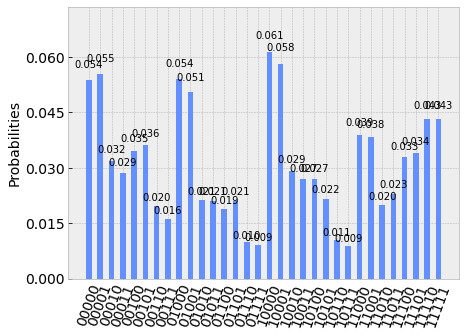

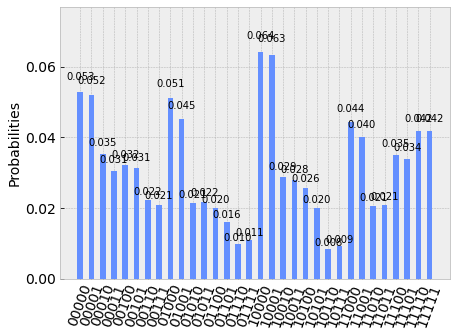

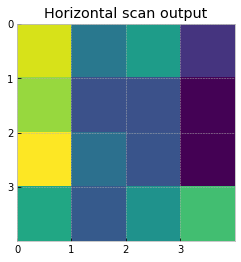

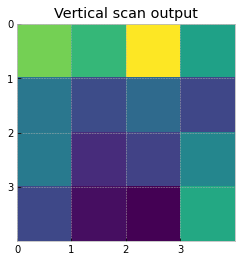

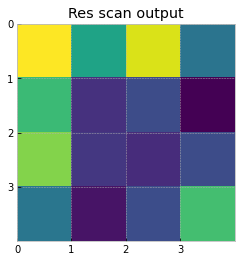

In [ ]:
import math
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import AerSimulator

sim_vigo = AerSimulator(noise_model=noise_thermal)
size = int(math.sqrt(2**data_qb))
qcs = []

def normalise(img):
    amp = img.reshape(size**2, 1)
    norm = np.linalg.norm(amp)
    if(norm == 0):
        amp[0] = 1
        norm = np.linalg.norm(amp)
    amp = amp/norm
    return amp.tolist()

def get_edge_scan(sv_h, sv_v):
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

    edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size)
    edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size).T

    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = edge_scan_h | edge_scan_v
    return edge_scan

def get_edge_scan_cnt(sv_h, sv_v):
    edge_scan_h = np.array([sv_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
    edge_scan_v = np.array([sv_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T
    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = np.sqrt(edge_scan_h**2 + edge_scan_v**2)
    plot_image(edge_scan, 'Res scan output')

    return edge_scan

def edge_detection(img):
    D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
    img = image
    arr_h = normalise(img)
    arr_v = normalise(img.T)

    #print(arr_h, image_norm_h)
    arr_h = Statevector(arr_h) 
    arr_v = Statevector(arr_v)

    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(arr_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)
    qc_h.measure_all()

    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(arr_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)
    qc_v.measure_all()

    trqc_h = transpile(qc_h, backend=sim_vigo, basis_gates=['cx', 'u', 'ry', 'h'])
    trqc_v = transpile(qc_v, backend=sim_vigo, basis_gates=['cx', 'u', 'ry', 'h'])

    circ_list = [trqc_h, trqc_v]

    qcs.append(qc_h)
    qcs.append(qc_v)

    job = execute(circ_list, backend=sim_vigo, shots=8192)
    job_monitor(job)
    results = job.result()
    sim_counts_h = results.get_counts(qc_h)
    sim_counts_v = results.get_counts(qc_v)
    sim_keys_h = sim_counts_h.keys()
    sim_keys_v = sim_counts_v.keys()
    display(plot_histogram(sim_counts_h))
    display(plot_histogram(sim_counts_v))
    get_edge_scan_cnt(sim_counts_h, sim_counts_v)

    return results
results = edge_detection(image)

32
Job Status: job has successfully run


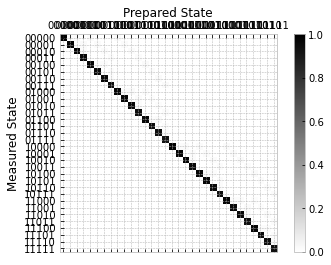

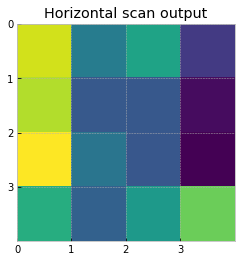

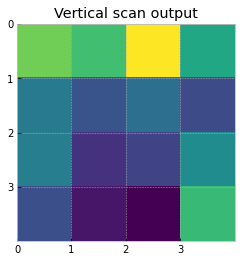

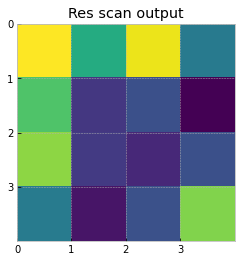

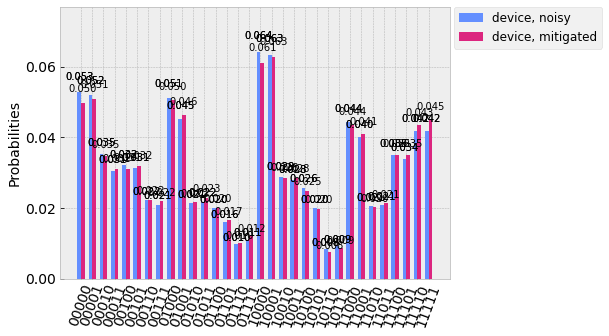

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

cal_circuits, state_labels = complete_meas_cal(qr=qcs[0].qregs[0], 
                                               circlabel='measurement_calibration')
print(len(cal_circuits))
cal_circuits[7].draw(output='mpl')

cal_job = execute(cal_circuits,
             backend=sim_vigo,
             shots=8192,
             optimization_level=0)

job_monitor(cal_job)
cal_results = cal_job.result()
plot_histogram(cal_results.get_counts(cal_circuits[7]))

meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

meas_filter = meas_fitter.filter

mitigated_result = meas_filter.apply(results)
device_counts_h = results.get_counts(qcs[0])
mitigated_counts_h = mitigated_result.get_counts(qcs[0])
plot_histogram([device_counts_h, mitigated_counts_h], 
               legend=['device, noisy', 'device, mitigated'])

mitigated_result = meas_filter.apply(results)
device_counts_v = results.get_counts(qcs[1])
mitigated_counts_v = mitigated_result.get_counts(qcs[1])
plot_histogram([device_counts_v, mitigated_counts_v], 
               legend=['device, noisy', 'device, mitigated'])

get_edge_scan_cnt(mitigated_counts_h, mitigated_counts_v)

plot_histogram([device_counts_v, mitigated_counts_v], 
               legend=['device, noisy', 'device, mitigated'])

#### Mitiq


In [ ]:
import math
from qiskit.tools.monitor import job_monitor
size = int(math.sqrt(2**data_qb))

qcs = []

def normalise(img):
    amp = img.reshape(size**2, 1)
    norm = np.linalg.norm(amp)
    if(norm == 0):
        amp[0] = 1
        norm = np.linalg.norm(amp)
    amp = amp/norm
    return amp.tolist()

def get_edge_scan(sv_h, sv_v):
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

    edge_scan_h = np.array([sv_h[f'{2*i+1:05b}'] if f'{2*i+1:05b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(size, size)
    edge_scan_v = np.array([sim_counts_v[f'{2*i+1:05b}'] if f'{2*i+1:05b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(size, size).T

    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = edge_scan_h | edge_scan_v
    return edge_scan

def get_edge_scan_cnt(sv_h, sv_v):
    edge_scan_h = np.array([sv_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
    edge_scan_v = np.array([sv_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T
    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = np.sqrt(edge_scan_h**2 + edge_scan_v**2)
    plot_image(edge_scan, 'Res scan output')

    return edge_scan

def edge_detection(circ):

    #qcs.append(qc_h)
    #qcs.append(qc_v)
    return execute(circ, backend=sim_vigo, shots=20000).result().get_counts(circ)
    #job_monitor(job)
    #return job

from mitiq import zne
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
img = image
arr_h = normalise(img)
arr_v = normalise(img.T)

#print(arr_h, image_norm_h)
arr_h = Statevector(arr_h) 
arr_v = Statevector(arr_v)

qc_h = QuantumCircuit(total_qb)
qc_h.initialize(arr_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
qc_h.measure_all()

qc_v = QuantumCircuit(total_qb)
qc_v.initialize(arr_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
qc_v.measure_all()

from qiskit.test.mock import FakeVigo
from qiskit.providers.aer import AerSimulator


device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(device_backend)
backend = sim_vigo

trqc_h = transpile(qc_h, backend=sim_vigo, basis_gates=['cx', 'u3', 'ry', 'h'])
trqc_v = transpile(qc_v, backend=sim_vigo, basis_gates=['cx', 'u3', 'ry', 'h'])

#qc_small_h_t = transpile(qc_h, backend=backend, optimization_level=3)
#qc_small_v_t = transpile(qc_v, backend=backend, optimization_level=3)
#circ_list = [trqc_h, trqc_v]

#results_h = zne.execute_with_zne(qc_h, edge_detection)
#results = edge_detection(image)

In [ ]:
results_h = zne.execute_with_zne(trqc_h, edge_detection)
sim_counts_h = results_h.get_counts(qc_h)
#sim_counts_v = results.get_counts(qc_v)
sim_keys_h = sim_counts_h.keys()
#sim_keys_v = sim_counts_v.keys()
display(plot_histogram(sim_counts_h))
#display(plot_histogram(sim_counts_v))
#get_edge_scan_cnt(sim_counts_h, sim_counts_v)


TypeError: ignored

In [ ]:
results_v = zne.execute_with_zne(qc_v, edge_detection)

#### manual transpile no opt

Counts for Horizontal scan:


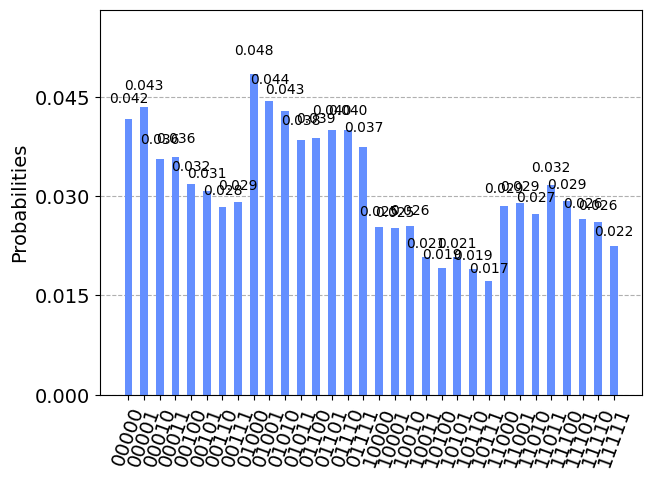



Counts for Vertical scan:


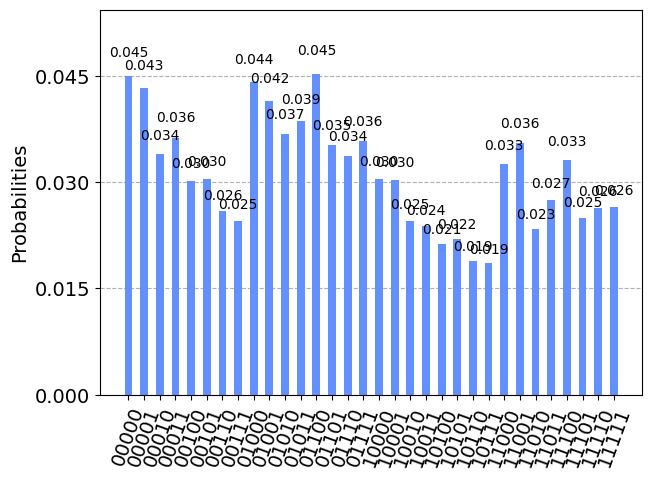

In [ ]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_h)
counts_v = result.get_counts(qc_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

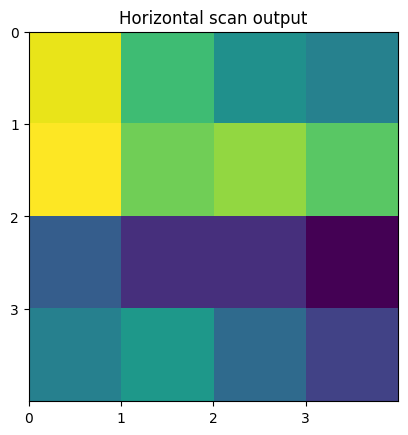

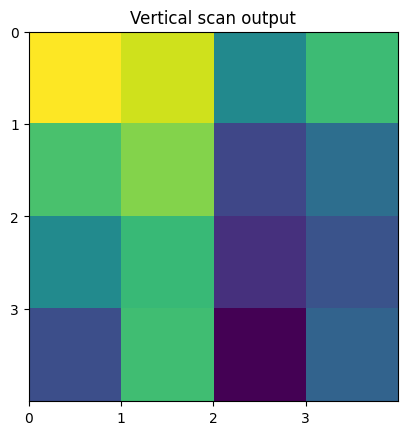

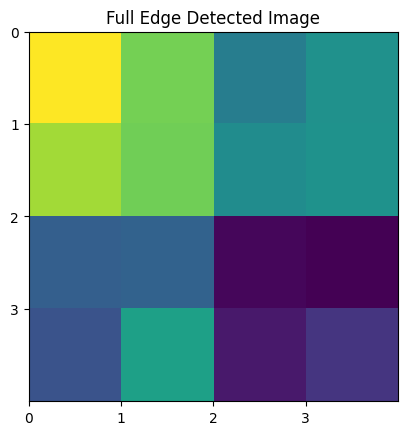

In [ ]:
edge_scan_small_h = np.array([counts_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')

edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')

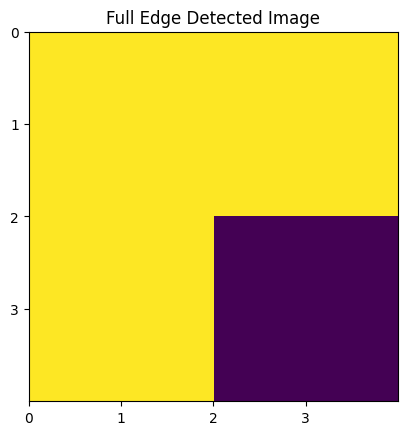

In [ ]:
plot_image(edge_detected_image_small > 410, 'Full Edge Detected Image')

#### manual transpile noopt

Counts for Horizontal scan:


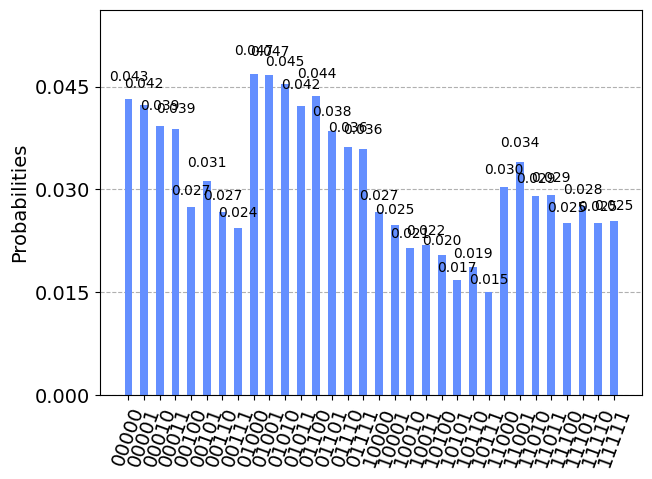



Counts for Vertical scan:


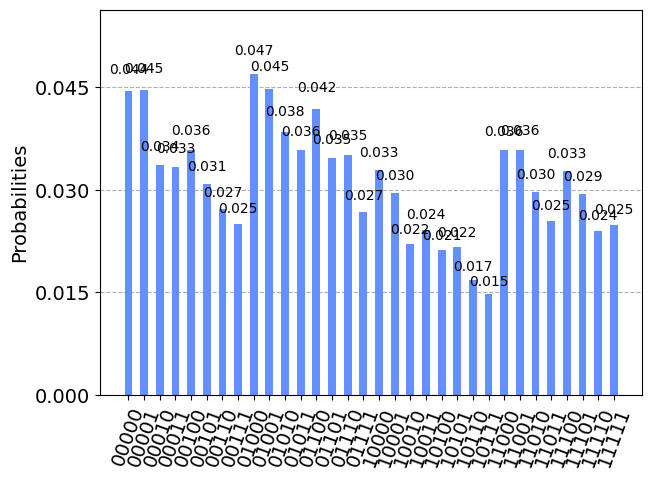

In [ ]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_h)
counts_v = result.get_counts(qc_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

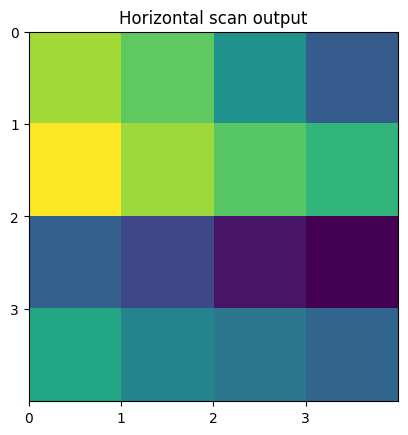

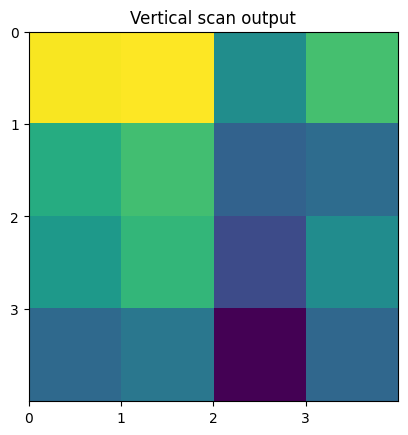

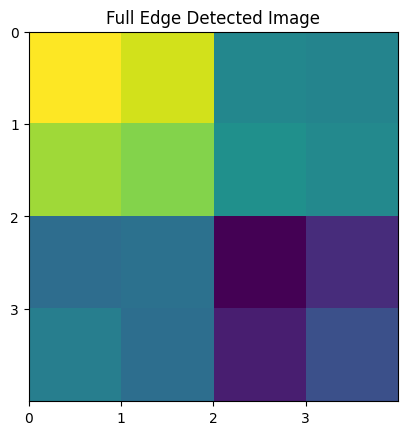

In [ ]:
edge_scan_small_h = np.array([counts_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')

edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')

#### auto transpile  ibmq_bogota


Counts for Horizontal scan:


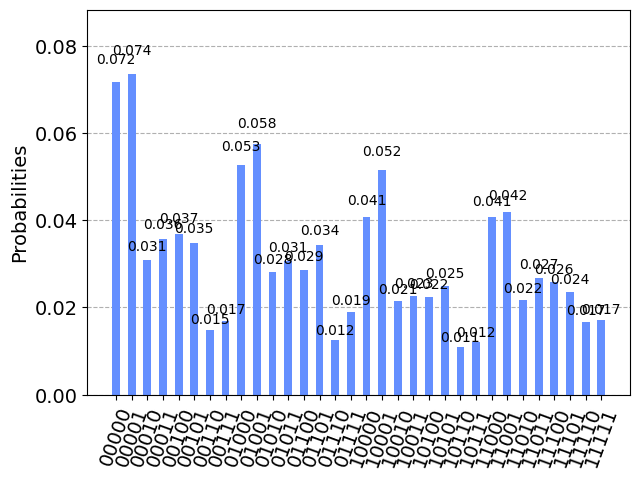



Counts for Vertical scan:


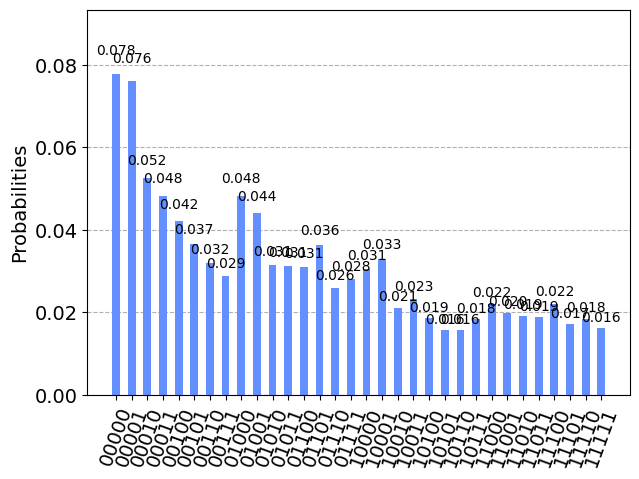

In [ ]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_h)
counts_v = result.get_counts(qc_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

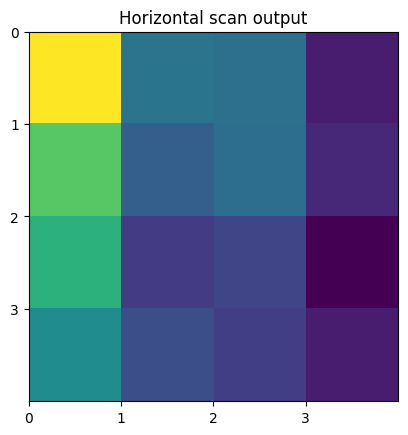

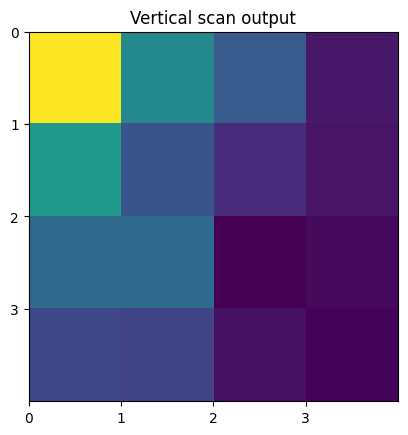

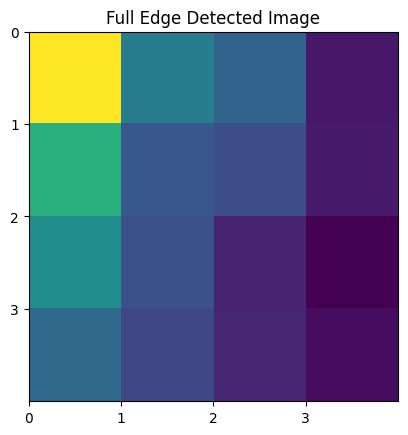

In [ ]:
edge_scan_small_h = np.array([counts_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')

edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')

#### auto transpile ibmq_belem

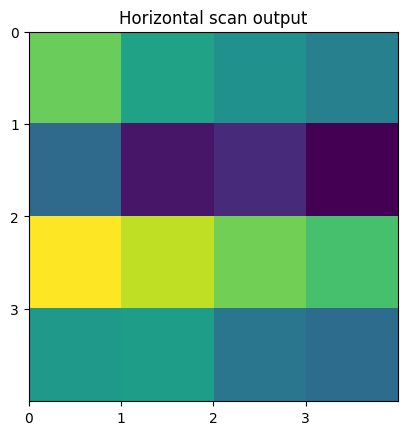

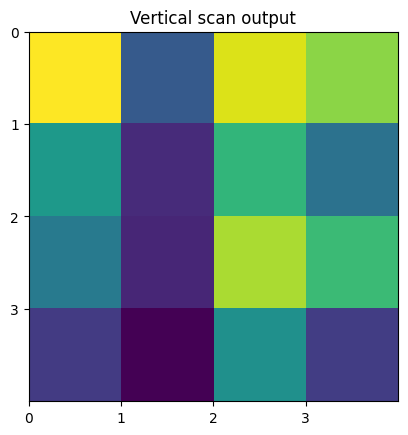

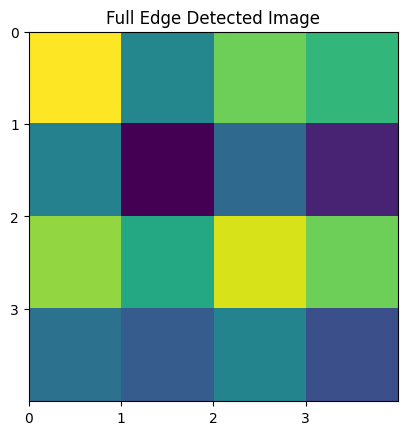

In [ ]:
edge_scan_small_h = np.array([counts_h[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:05b}'] for i in range(2**data_qb)]).reshape(4, 4).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')

edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')

Counts for Horizontal scan:


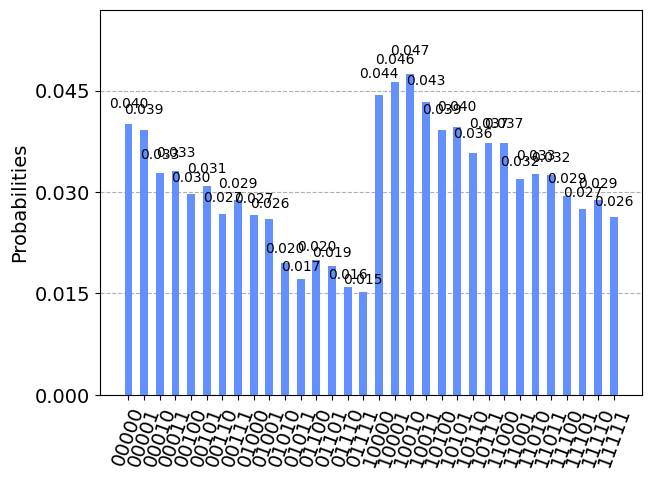



Counts for Vertical scan:


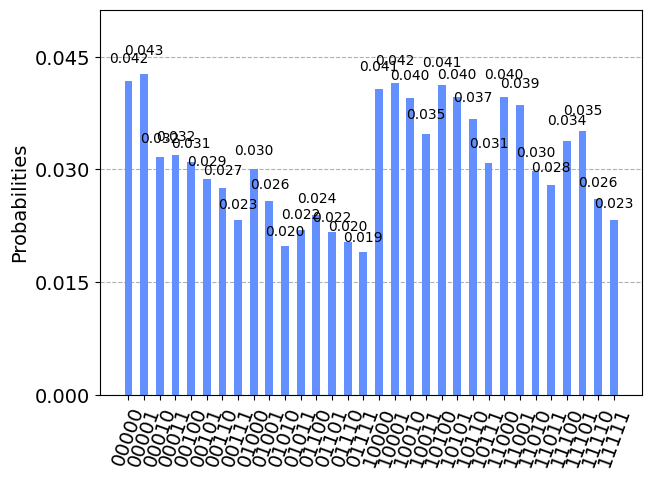

In [ ]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_h)
counts_v = result.get_counts(qc_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

#### simulator


In [ ]:
sorted([int(x, 2) for x in sim_keys_h])

[0, 1, 2, 3, 6, 7, 8, 10, 12, 14, 15, 16, 17, 18, 19]

In [ ]:
sorted([int(x, 2) for x in sim_keys_v])

[0, 1, 2, 3, 6, 7, 8, 10, 12, 13, 16, 17, 18, 19, 24, 25, 26, 27]

In [ ]:
[int(f'{2*i+1:05b}', 2) for i in range(2**data_qb)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

Counts for Horizontal scan:


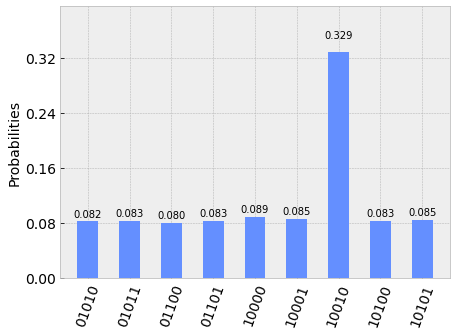



Counts for Vertical scan:


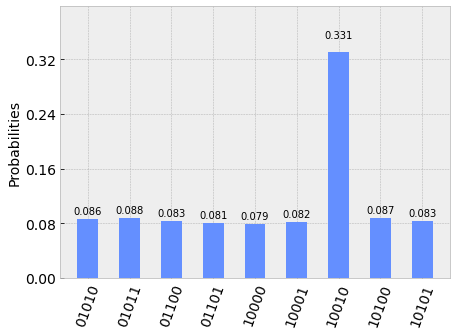

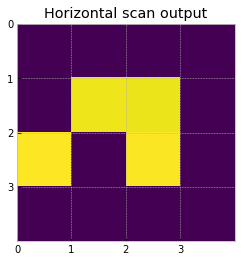

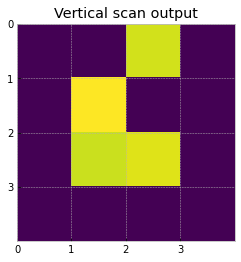

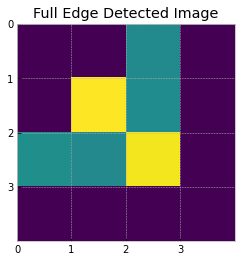

array([[   0,    0,  668,    0],
       [   0, 1401,  679,    0],
       [ 700,  660, 1379,    0],
       [   0,    0,    0,    0]])

In [ ]:
# Initialise the qasm_simulator from the Aer package
circ_list_t = [qc_h, qc_v]

sim = Aer.get_backend('qasm_simulator')
res = sim.run(circ_list_t, shots=8192).result()
sim_counts_h = res.get_counts(qc_h)
sim_counts_v = res.get_counts(qc_v)
sim_keys_h = sim_counts_h.keys()
sim_keys_v = sim_counts_v.keys()

print('Counts for Horizontal scan:')
display(plot_histogram(sim_counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(sim_counts_v))
size = int(math.sqrt(2**data_qb))
edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:05b}'] if f'{2*i+1:05b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(size, size)
edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:05b}'] if f'{2*i+1:05b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(size, size).T

plot_image(edge_scan_sim_h, 'Horizontal scan output')
plot_image(edge_scan_sim_v, 'Vertical scan output')

edge_detected_sim_small = edge_scan_sim_h + edge_scan_sim_v

# Plotting the original and edge-detected images
plot_image(edge_detected_sim_small, 'Full Edge Detected Image')
edge_detected_sim_small

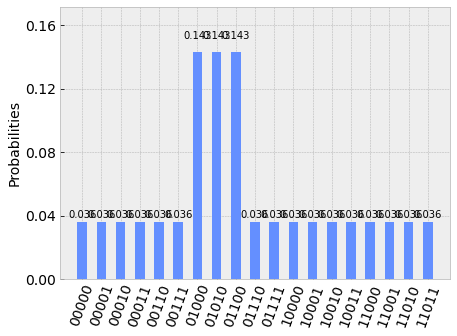

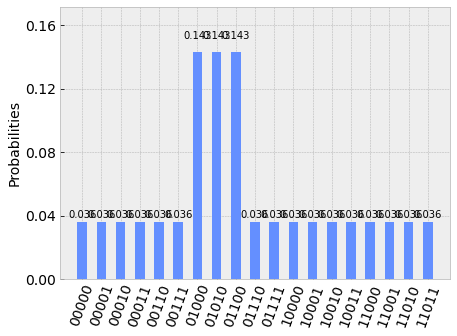

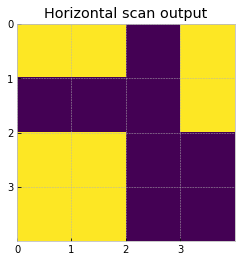

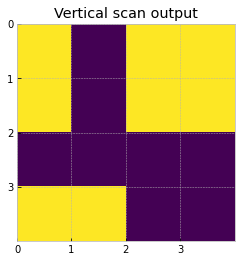

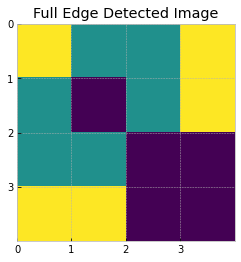

array([[0.07142857, 0.03571429, 0.03571429, 0.07142857],
       [0.03571429, 0.        , 0.03571429, 0.07142857],
       [0.03571429, 0.03571429, 0.        , 0.        ],
       [0.07142857, 0.07142857, 0.        , 0.        ]])

In [17]:
import math
size = int(math.sqrt(2**4))
data_qb = 4
def normalise(img):
    amp = img.reshape(size**2, 1)
    norm = np.linalg.norm(amp)
    if(norm == 0):
        amp[0] = 1
        norm = np.linalg.norm(amp)
    amp = amp/norm
    return amp.tolist()

def get_edge_scan(qc_h, qc_v, res):
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)
    sim_counts_h = res.get_counts(qc_h)
    sim_counts_v = res.get_counts(qc_v)
    sim_keys_h = sim_counts_h.keys()
    sim_keys_v = sim_counts_v.keys()
    #edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size)
    #edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size).T
    #print(np.around(sv_h, 4))
    edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:05b}'] if f'{2*i+1:05b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(size, size)
    edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:05b}'] if f'{2*i+1:05b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(size, size).T

    plot_image(edge_scan_sim_h, 'Horizontal scan output')
    plot_image(edge_scan_sim_v, 'Vertical scan output')

    edge_detected_sim_small = edge_scan_sim_h + edge_scan_sim_v

    # Plotting the original and edge-detected images
    plot_image(edge_detected_sim_small, 'Full Edge Detected Image')
    return edge_detected_sim_small

def edge_detection(img):
    D2n_1 = np.roll(np.identity(2**5), 1, axis=1)

    arr_h = normalise(img)
    arr_v = normalise(img.T)

    #print(arr_h, image_norm_h)
    arr_h = Statevector(arr_h) 
    arr_v = Statevector(arr_v)

    total_qb = 5
    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(arr_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)

    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(arr_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)

    circ_list = [qc_h, qc_v]
    back = Aer.get_backend('statevector_simulator')
    results = execute(circ_list, backend=back).result()
    sv_h = results.get_statevector(qc_h)
    sv_v = results.get_statevector(qc_v)
    sim_counts_h = results.get_counts(qc_h)
    sim_counts_v = results.get_counts(qc_v)
    sim_keys_h = sim_counts_h.keys()
    sim_keys_v = sim_counts_v.keys()
    display(plot_histogram(sim_counts_h))
    display(plot_histogram(sim_counts_v))
    return get_edge_scan(qc_h, qc_v, results)
edge_detection(image)

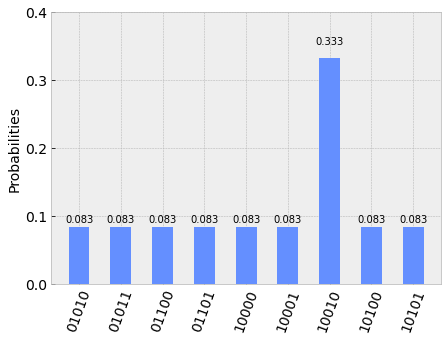

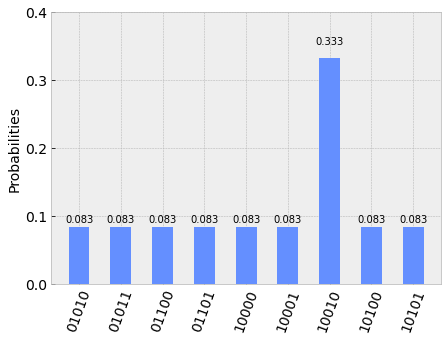

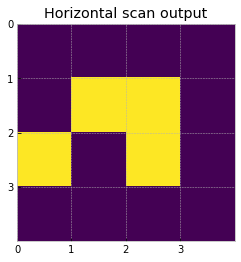

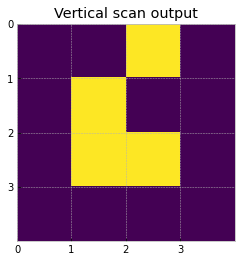

array([[0, 0, 1, 0],
       [0, 1, 1, 0],
       [1, 1, 1, 0],
       [0, 0, 0, 0]])

In [ ]:
import math
size = int(math.sqrt(2**data_qb))

def normalise(img):
    amp = img.reshape(size**2, 1)
    norm = np.linalg.norm(amp)
    if(norm == 0):
        amp[0] = 1
        norm = np.linalg.norm(amp)
    amp = amp/norm
    return amp.tolist()

def get_edge_scan(sv_h, sv_v):
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

    edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size)
    edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(size, size).T

    plot_image(edge_scan_h, 'Horizontal scan output')
    plot_image(edge_scan_v, 'Vertical scan output')

    edge_scan = edge_scan_h | edge_scan_v
    return edge_scan

def edge_detection(img):
    D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

    arr_h = normalise(img)
    arr_v = normalise(img.T)

    #print(arr_h, image_norm_h)
    arr_h = Statevector(arr_h) 
    arr_v = Statevector(arr_v)

    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(arr_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)

    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(arr_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)

    circ_list = [qc_h, qc_v]
    back = Aer.get_backend('statevector_simulator')
    results = execute(circ_list, backend=back).result()
    sv_h = results.get_statevector(qc_h)
    sv_v = results.get_statevector(qc_v)
    sim_counts_h = results.get_counts(qc_h)
    sim_counts_v = results.get_counts(qc_v)
    sim_keys_h = sim_counts_h.keys()
    sim_keys_v = sim_counts_v.keys()
    display(plot_histogram(sim_counts_h))
    display(plot_histogram(sim_counts_v))
    return get_edge_scan(sv_h, sv_v)
edge_detection(image)